<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 Reduction Exercise: Part 1</h2>

In this exercise you will go through and view all of your data to check for any issues.  You will also access the logs and you will each make your own lists of all the data that fits into a set of categories.

copy over 

<h4> Copy over the images from a public shared drive to <i>your</i> departmental shared disk space </h4>

You will reduce the data only for your observation night.  The department has created space for each of you on its network drive space.  You will store all of your data there so that you can work from any computer.

Text in quotes <> indicates a placeholder value that you will need to fill in.  For example < your night> could be 20191104.  Substitute only uout name here.  Don't include a space at the beginning as I just had to put that in to get it to display properly.

The raw data are all stored in the ~/RFSLAB/USER_DPT/_PUBLIC/ASTR596/Data/Raw/< your night>

Your personal network drive space is at ~/RFSLAB/USER_DPT/< KUID>

To copy over the data from the public directory to your directory go to your network directory in the command line and:

1. make a directory tree called "ASTR596/Data/Raw" and cd into that directory

2. from within that directory type (without the quotes <i>rsync -u -a -v ~/RFSLAB/USER_DPT/_PUBLIC/ASTR596/Data/Raw/< your_night> .</i>, where there is a space before the final "."

3. Make directories in your personal space called ~/RFSLAB/USER_DPT/< KUID>/ASTR596/Data/Reduced/< your_night> and ~/RFSLAB/USER_DPT/< KUID>/ASTR596/Data/Files 

4. You will need to make lists that contain the different kinds of images.  Open the log file on google docs for your night.  


Everywhere with a \***** you will need to change the code

<h4>What to hand in</h4>
You should make a copy of this notebook to your own directory and add that to your own repository.

You will hand in this completed notebook that includes all of your overscan check plots.

In [1]:
import numpy as np
from astropy import units as u

# this is a list of all the bias image names
#********************
biaslist = np.array(['b000.fits','b001.fits', 'b002.fits', 'b003.fits', 'b004.fits', 'b005.fits', 'b006.fits', 'b007.fits', 'b008.fits', 'b009.fits', 'b010.fits', 'b011.fits', 'b012.fits', 'b013.fits', 'b014.fits', 'b015.fits', 'b016.fits', 'b017.fits', 'b018.fits', 'b019.fits', 'b020.fits', 'b021.fits' ])

5. Repeat for the twilight flat frames in each filter using a list called "flatlist_< filtname>", where filname shoudl be B, V, or R .



In [2]:
#this is a list of all the flatfield images.  There may need to be more than one list
#*************
flatlist_V = np.array(['f023.fits', 'f024.fits', 'f025.fits', 'f026.fits', 'f027.fits', 'f028.fits'])
flatlist_B=np.array(['f029.fits', 'f030.fits','f031.fits', 'f032.fits', 'f033.fits'])

6. Repeat for the science frames, where this should only include the frames that you are using for science on your clusters.  Do **not** include focus, pointing, or test frames.  These should be called, e.g. "sciencelist_< filtname>_< cluster name>"

In [3]:
#this is a list of all the science images.  There may need to be more than one list
#*************
sciencelist_B_NGC7296 = np.array(['s051.fits', 's052.fits', 's053.fits', 's054.fits', 's055.fits', 's056.fits', 's057.fits', 's058.fits', 's059.fits', 's071.fits', 's072.fits', 's073.fits'])
sciencelist_V_NGC7296= np.array(['s060.fits', 's061.fits', 's062.fits', 's063.fits', 's064.fits', 's065.fits', 's066.fits', 's067.fits', 's068.fits', 's069.fits', 's070.fits'])
sciencelist_V_KING20=np.array([])
for i in range(88, 99): #choosing range of fits
        sciencelist_V_KING20= np.append(sciencelist_V_KING20, "s0%s.fits" %(i))
        i+=1
sciencelist_V_KING20=sciencelist_V_KING20.astype('U9')
sciencelist_B_KING20=np.array([])
sciencelist_V_KING20=sciencelist_V_KING20.astype('U9')
for i in range(75, 88): #choosing range of fits
        sciencelist_B_KING20= np.append(sciencelist_B_KING20, "s0%s.fits" %(i))
        i+=1
sciencelist_B_KING20=np.append(sciencelist_B_KING20,['s099.fits', 's100.fits', 's101.fits'])
sciencelist_B_KING20=sciencelist_B_KING20.astype('U9')
sciencelist_B_KING20



array(['s075.fits', 's076.fits', 's077.fits', 's078.fits', 's079.fits',
       's080.fits', 's081.fits', 's082.fits', 's083.fits', 's084.fits',
       's085.fits', 's086.fits', 's087.fits', 's099.fits', 's100.fits',
       's101.fits'], dtype='<U9')

7. open ds9 and one after the other display the images in the lists above, which is fewer than the actual number of images you took in a night, and examine them to make sure that there is nothing wrong with them, e.g. satellite trails, very elongated stars.  Make a list that contains any bad images there.  *Ask me if you are unsure what a bad image is.*

Then use the code below to trim the bad images from each of your lists.

You will need to execute the routine in the immediately following cell

In [12]:
#Bias frames:b009 and b021 appear to be overexposed but they values are the same and using zscale you get similar results
#Flats: dead column in all flats. x=1632 hot columns in x=1631, 1633, also 3 hot rows in all flats.
#NGC 7296 B science: nothing notable
#NGC 7296 V science: nothing notable
#KING 20 B science:nothing notable
#KING 20 V science: nothing notable 


# I did not see anything that should drastically affect the images so I am claiming that all of the images are usable. 

In [13]:
#define a function that takes an array of image names and an array of bad images and 
#returns a list of images that were not in the bad list
def imlist_clean(imlist, badlist):

    #updated versions of your image list that excludes these bad images
    #this intializes it
    goodimlist = np.array([]) 

    #this loops through every element in badlist
    for i in range(len(imlist)): 
    
        #see if that element of imlist exists in the list of bad images.
        #ibad is an array of indices of the array badlist that match the element of imlist
        ibad = np.where(badlist == imlist[i]) 

        #this is just to reformat ibad, which is output by where as a 2D array, where the 
        #first element is the one we want
        ibad = ibad[0]  

        #this tests if there was a match with badlist.  If there was not, then append
        #the good image names to the good image list
        if ibad.size==0: 
            goodimlist = np.append(goodimlist,imlist[i]) 

    #return something from the routine
    return(goodimlist)


The following cell is where you remove the bad images from your list.  If there are no bad images, you should make the badlist be an empty array but you still need to run the imlist_clean() routine

In [14]:
#a list of bad images
#*************
badlist = np.array([])

#make a cleaned version of the biaslist
biaslist_good = imlist_clean(biaslist,badlist)
print("biaslist_good = ",biaslist_good)

#Now repeat this block of code for the twilight flats and the science flats in each band




good_B_k20=imlist_clean(sciencelist_B_KING20,badlist)
good_V_k20=imlist_clean(sciencelist_V_KING20, badlist)
good_B_NGC7296=imlist_clean(sciencelist_B_NGC7296, badlist)
good_V_NGC7296=imlist_clean(sciencelist_V_NGC7296, badlist)
good_flat_V=imlist_clean(flatlist_V, badlist)
good_flat_B=imlist_clean(flatlist_B, badlist)



biaslist_good =  ['b000.fits' 'b001.fits' 'b002.fits' 'b003.fits' 'b004.fits' 'b005.fits'
 'b006.fits' 'b007.fits' 'b008.fits' 'b009.fits' 'b010.fits' 'b011.fits'
 'b012.fits' 'b013.fits' 'b014.fits' 'b015.fits' 'b016.fits' 'b017.fits'
 'b018.fits' 'b019.fits' 'b020.fits' 'b021.fits']


/home/s376r951/.conda/envs/python3env/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


<h4>Trim the overscan from every image </h4>

We will be using the "ccdproc" package in python, which has a built in "CCDData" object.

You will read in every image and run a ccdproc command that takes the median of each row of the overscan region and fits a polynomial to these median values over all rows.  This polynomial will then be subtracted from each row of the image.  It will then write out the image.

Before you do this, you will create an image that contains the uncertainty of every pixel based on the Poisson counts and the readnoise.

Make a directory in which all your reduced images will be saved.  This should be 

In running the overscan subtraction you will need to tell the code what rows and columns to use.  In specifying this, assume: 1) that the array is square; 2) that python arrays start with zero while FITS images start with one; 3) that python arrays index rows as the first element and columns as the second.  So accessing the 9th and 10th column of an image is done by im[:,8:9]

The readme docs that describe this process are given at: https://ccdproc/readthedocs.io/en/latest/reduction_toolbox.html

In [26]:
from astropy.nddata import CCDData
import ccdproc
from astropy.modeling import models
from matplotlib import pyplot as plt

#A function that subtracts the overscan region from a list of images.  
def oscan_subtract(imlist, redpath, rawpath):
    #Parameters are imlist = an array of image names
    #redpath = the path where the reduced images will be written
    #rawpath = the path where the raw images are located

    #*************
    
    #We read out on the left side of the images
    
    #Look in the telescope manual on google drive for the gain and readnoise values
    g =2.13  #gain in units of electrons/ADU
    rn = 2.88 #readnoise in electrons
    

    
    #overscan region is [2048:2200,1:2048]
    #loop over every image name in the bias list
    for imname in biaslist_good:
    
        #create the image name, including the path
        imstr = rawpath + imname
        #read that into a CCDData object.  This allows you to specify a unit
        im = CCDData.read(imstr,unit = "adu")

        #in computing the noise you need to convert the image from ADU into electrons
        #the uncertainty of a pixel is u=sqrt(g*p + sigma_RN**2), where g is the gain
        #p is the pixel count in ADU and sigma_RN is the readnoise
        #the u.<blah> is a python way of specifying unit that goes along with the number

        im_with_err = ccdproc.create_deviation(im,gain=g * u.electron/u.adu, readnoise=rn*u.electron)
    
        #gain correct the images
        gain_corr_im = ccdproc.gain_correct(im_with_err,g * u.electron/u.adu)
    
        #overscan correction
        #specify the order of the polynomial that you will use.  start with a polynomial 
        #of one term (constant) and see how well it does
        #**********
        poly_model = models.Polynomial1D(1)
        oscan_sub_im = ccdproc.subtract_overscan(gain_corr_im,overscan = gain_corr_im[:,1947:2047], \
                                                 overscan_axis=1,model=poly_model)
    
        #make a plot of the median of each row of the now-subtracted overscan columns
        #to make sure that they are centered around zero
        #first make an array of zeros that is the same number of rows of the image
        oscan_check = np.zeros(len(np.asarray(oscan_sub_im[:])) )
        #now fill in an array with the row number
        oscan_check_nrow = np.arange(len(np.asarray(oscan_sub_im[:])) )
        #now go through every row, take the median, and put it into the check array
        #**********
        for i in range(len(np.asarray(oscan_sub_im[:]))): 
            oscan_check[i] = np.median(oscan_sub_im[i,:1947])
            
        #make a plot of the median vs the row number
        #**********
        plt.plot(oscan_check_nrow,oscan_check,'bo')
        plt.show()
        
        #trim off the overscan regions
        #**********
        trimmed_im = ccdproc.trim_image(oscan_sub_im[:1947])
        
        #write the image
        tr_imname = imname.replace('.fits','_tr.fits',1)
        tr_imnamestr = redpath + tr_imname
        trimmed_im.write(tr_imnamestr,overwrite=True)

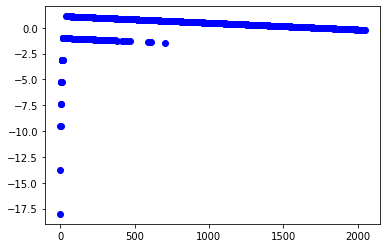

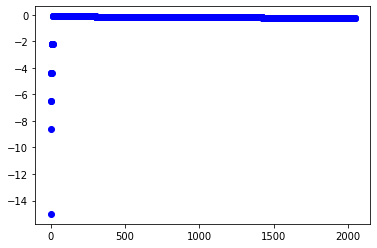

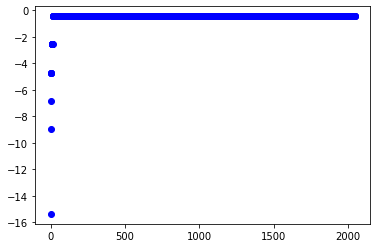

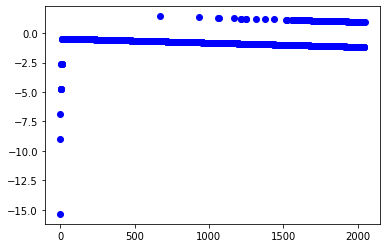

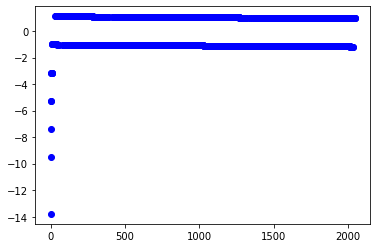

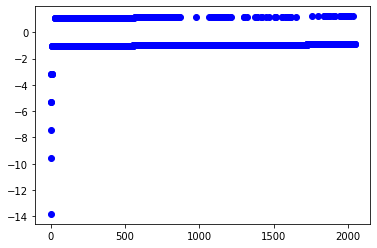

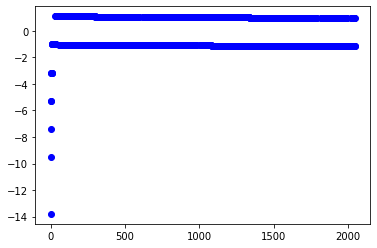

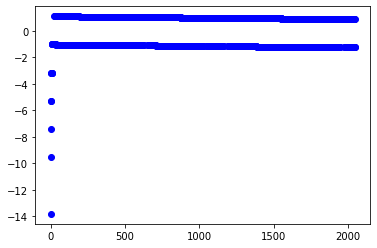

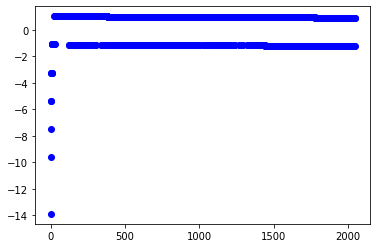

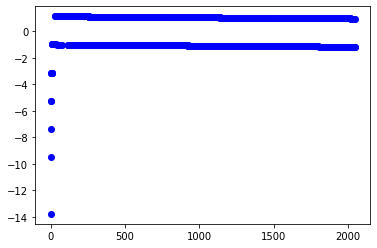

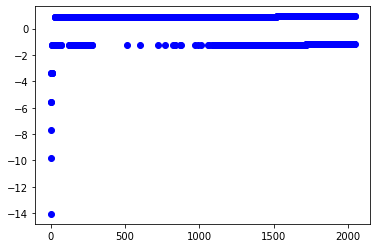

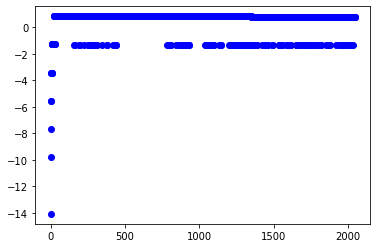

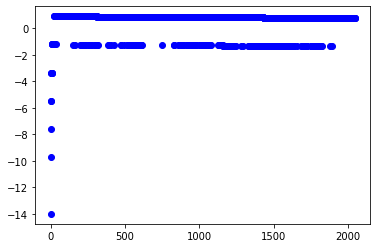

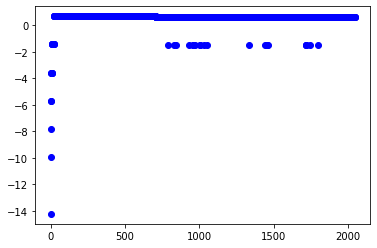

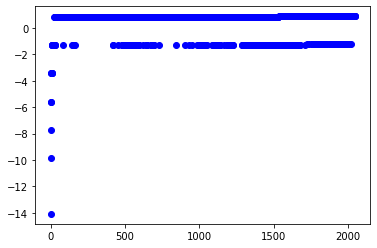

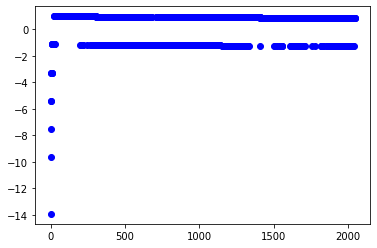

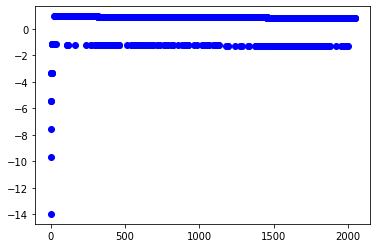

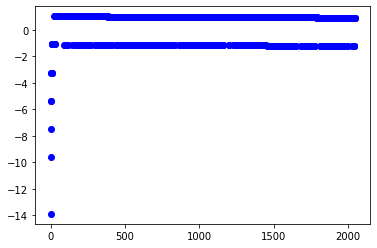

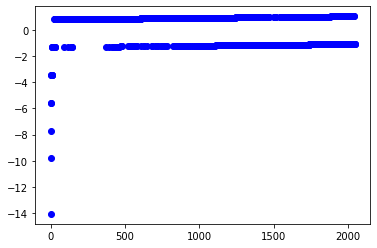

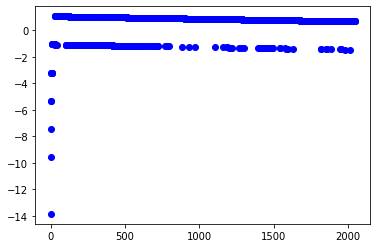

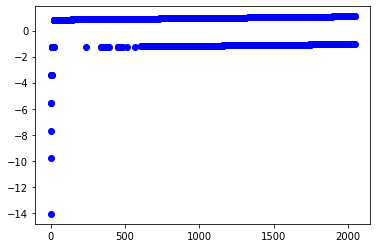

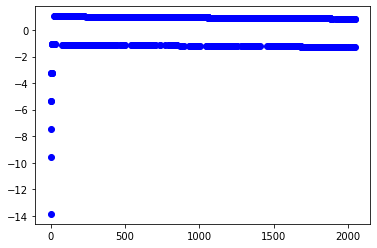

In [27]:
#perform overscan subtraction on the bias frames
#the reduction path
#****** This should be the absolute path to your files
rawpath = "/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Raw/20191104/"
redpath = "/home/s376r951/RFSLAB/USER_DPT/s376r951/Data/Reduced/"

oscan_subtract(biaslist_good, redpath, rawpath)

When you have run your code with no bugs, you should check that 1) the plots look like you've done the correct overscan subtraction, 2) you have the right polynomial order, 3) by checking in ds9 that you have trimmed the images correctly.  Step #3 likely only needs to be done for a couple of images.

SyntaxError: invalid syntax (<ipython-input-10-63487dca4a6f>, line 1)